In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('./data_dc/final_merged_cleaned.csv')

In [3]:
data.head()

Unnamed: 0    ValidEnd     Name state  area_none   area_d0  area_d1  \
0           0  2021-01-04  Alabama    AL   47712.19   3892.15      0.0   
1           1  2020-12-28  Alabama    AL   39068.95  12535.39      0.0   
2           2  2020-12-21  Alabama    AL   39068.95  12535.40      0.0   
3           3  2020-12-14  Alabama    AL   42812.87   8791.48      0.0   
4           4  2020-12-07  Alabama    AL   45608.51   5995.84      0.0   

   area_d2  area_d3  area_d4  ...  population_d3  population_d4  DSCI  \
0      0.0      0.0      0.0  ...            0.0            0.0     8   
1      0.0      0.0      0.0  ...            0.0            0.0    24   
2      0.0      0.0      0.0  ...            0.0            0.0    24   
3      0.0      0.0      0.0  ...            0.0            0.0    17   
4      0.0      0.0      0.0  ...            0.0            0.0    12   

   total_area  total_population   avg_tmax   avg_tmin  total_avg_prcp_inches  \
0    51604.34        4779736.02  67.940000  41.450000                  0.000   
1    51604.34        4779736.02  57.797143  30.522857                  1.440   
2    51604.35        4779736.02  53.634286  34.314286                  0.354   
3    51604.35        4779736.02  64.145714  38.808571                  1.236   
4    51604.35        4779736.02  55.377143  31.965714                  0.852   

   total_avg_prcp_mm  climate_regions  
0             0.0000        Southeast  
1            36.5760        Southeast  
2             8.9916        Southeast  
3            31.3944        Southeast  
4            21.6408        Southeast  

[5 rows x 24 columns]

In [4]:
#dropping december week
indexNames = data[ data['ValidEnd'] == '2021-01-04' ].index
data.drop(indexNames , inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46980 entries, 1 to 47024
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             46980 non-null  int64  
 1   ValidEnd               46980 non-null  object 
 2   Name                   46980 non-null  object 
 3   state                  46980 non-null  object 
 4   area_none              46980 non-null  float64
 5   area_d0                46980 non-null  float64
 6   area_d1                46980 non-null  float64
 7   area_d2                46980 non-null  float64
 8   area_d3                46980 non-null  float64
 9   area_d4                46980 non-null  float64
 10  population_none        46980 non-null  float64
 11  population_d0          46980 non-null  float64
 12  population_d1          46980 non-null  float64
 13  population_d2          46980 non-null  float64
 14  population_d3          46980 non-null  float64
 15  po

In [6]:
data.shape

(46980, 24)

In [7]:
#change the format of the time of the regions
data['ValidEnd']= pd.to_datetime(data['ValidEnd'])
data['ValidEnd'] = data['ValidEnd'].dt.strftime('%m/%d/%Y')
data['ValidEnd']=data['ValidEnd'].astype('datetime64[ns]')

## graphics of the Climate regions 

In [8]:
data.groupby(data['climate_regions'])['DSCI'].mean()

climate_regions
Northeast                       36.195163
Northern Rockies and Plains    105.121073
Northwest                      111.024904
Ohio Valley                     36.665572
South                           85.607120
Southeast                       78.231960
Southwest                      162.314416
Upper Midwest                   49.033285
West                           166.890805
Name: DSCI, dtype: float64

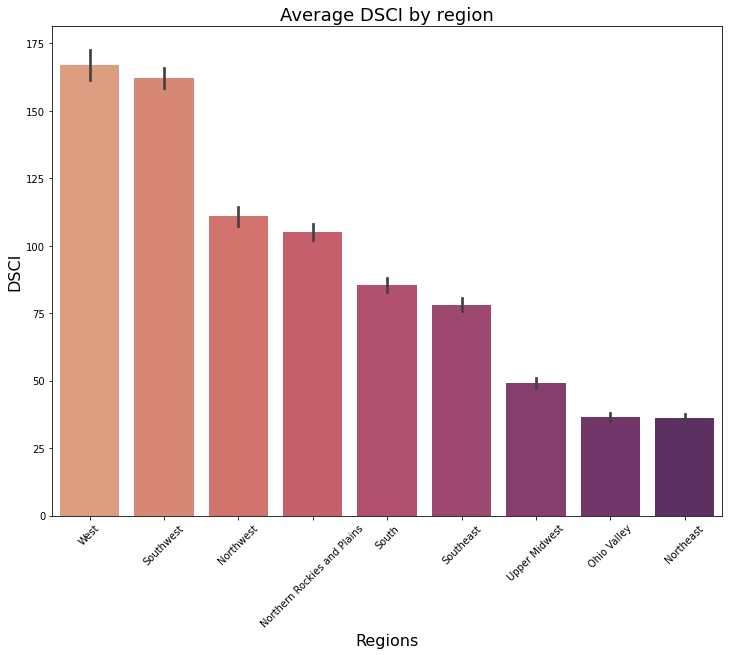

In [9]:
order= data.groupby(data['climate_regions'])['DSCI'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='climate_regions',
    y='DSCI',
    data=data,order=order,palette="flare");
plt.title('Average DSCI by region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('DSCI',fontdict={'fontsize':16});
plt.xticks(rotation=45)
plt.savefig('./images_j/Average_DSCI_of_20.png')

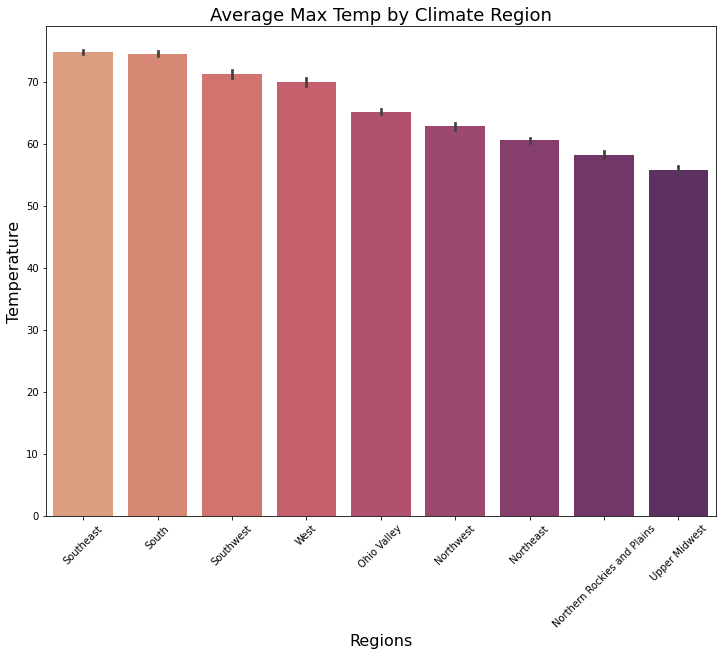

In [10]:
order= data.groupby(data['climate_regions'])['avg_tmax'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='climate_regions',
    y='avg_tmax',
    data=data,order=order,palette="flare");
plt.title('Average Max Temp by Climate Region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('Temperature',fontdict={'fontsize':16});
plt.xticks(rotation=45)
plt.savefig('./images_j/Average_temperature_of_20.png')

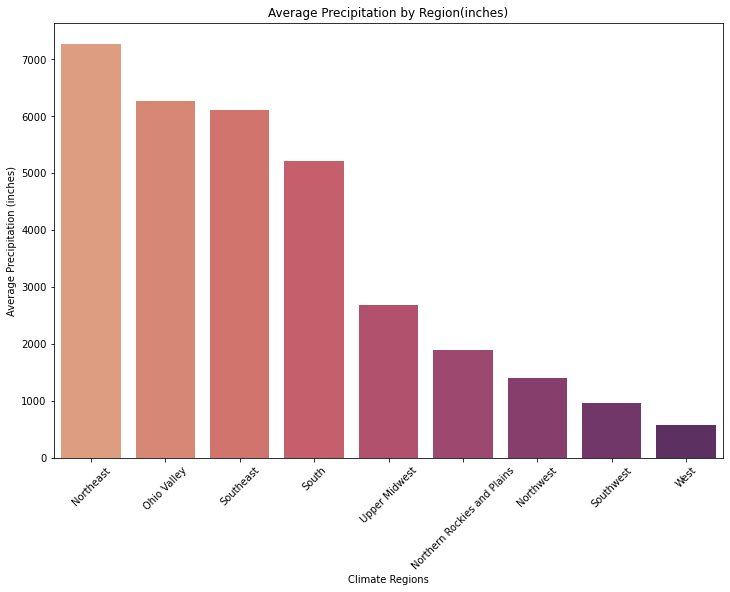

In [11]:

order= data.groupby(data['climate_regions'])['total_avg_prcp_inches'].sum()
order_index= data.groupby(data['climate_regions'])['total_avg_prcp_inches'].sum().sort_values().iloc[::-1].index

order=pd.DataFrame(order)
order.reset_index(inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x='climate_regions',
    y='total_avg_prcp_inches',
    data=order,order=order_index,palette="flare");
plt.title('Average Precipitation by Region(inches)',fontdict={'fontsize':12});
plt.xlabel('Climate Regions',fontdict={'fontsize':10});
plt.xticks(rotation=45)
plt.ylabel('Average Precipitation (inches)',fontdict={'fontsize':10})
plt.savefig('./images_j/average_prec.png')

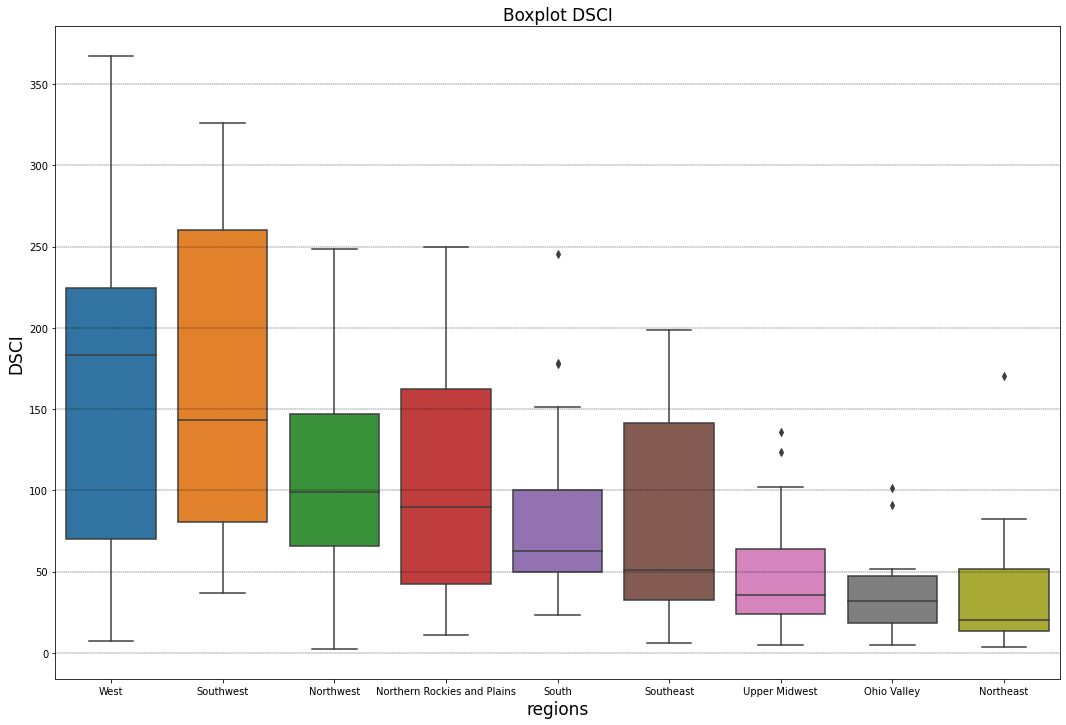

In [15]:
#graph the DCSI of the regions
order= df_regions_years.groupby(df_regions_years['climate_regions'])['mean'].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(18, 12))
sns.boxplot(x='climate_regions',
    y='mean',
    data=df_regions_years,order=order)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('regions',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('./images_j/boxplot_DSCI.png')

## graphics of Time serie of the Climate regions 

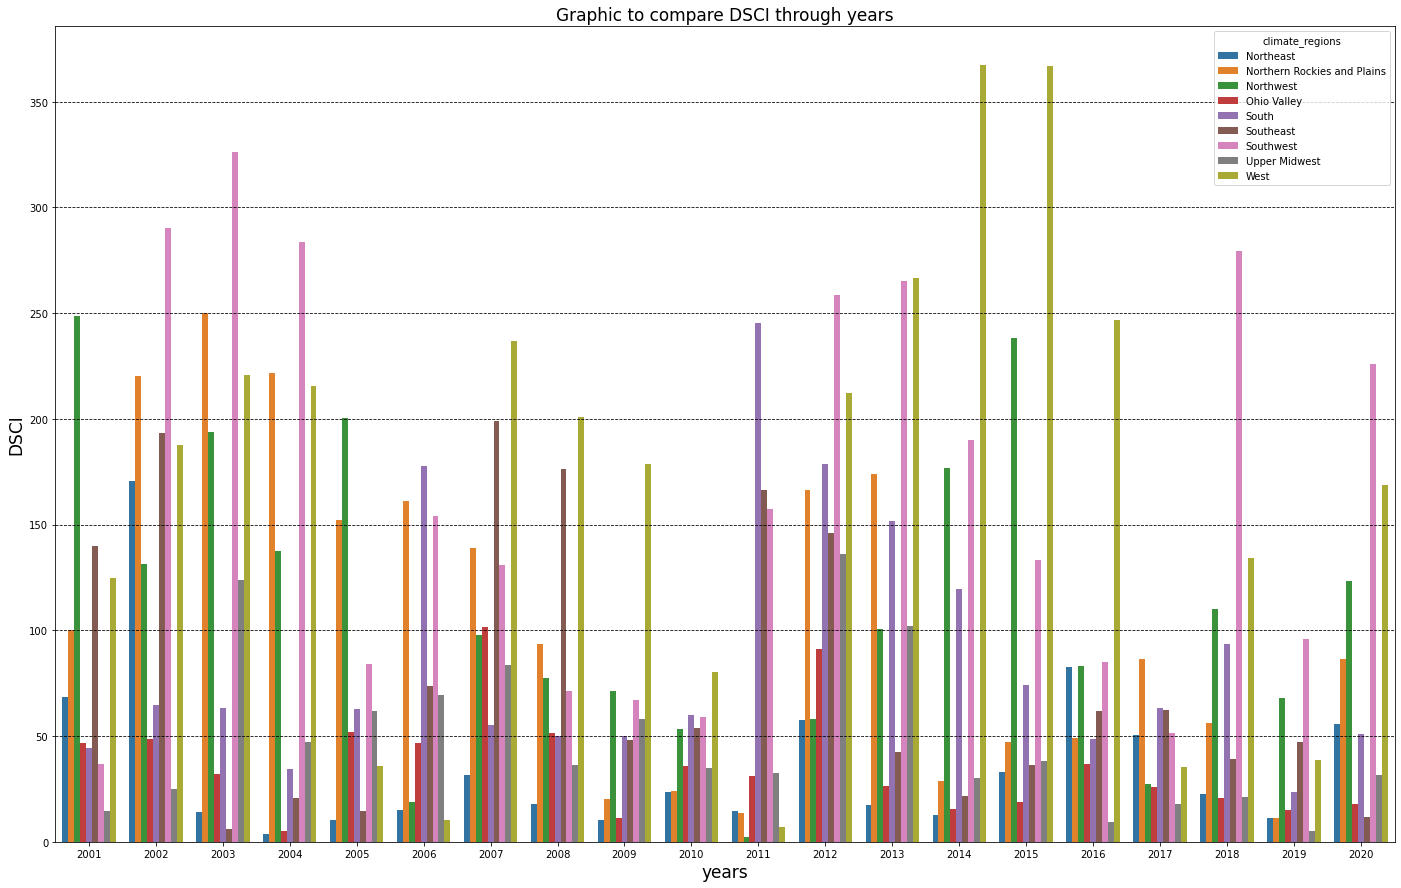

In [14]:

df_regions_years=data.groupby(by=[data['ValidEnd'].dt.year,data['climate_regions']])['DSCI'].agg([ 'mean'])

df_regions_years.reset_index(inplace=True)
#graph the DCSI of the regions
plt.figure(figsize=(24, 15))
sns.barplot(x='ValidEnd',
    y='mean',
    hue='climate_regions',
    data=df_regions_years)
plt.title('Graphic to compare DSCI through years',fontdict={'fontsize':17});
plt.xlabel('years',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)
plt.savefig('./images_j/dsci_regions.png')

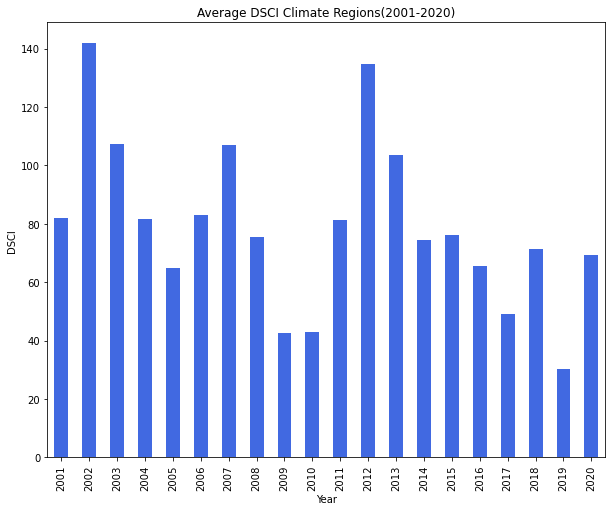

In [16]:
years_DSCI = data.groupby(data['ValidEnd'].dt.year)['DSCI'].mean()
years_DSCI.plot(kind = 'bar', figsize = (10, 8), color='royalblue')
plt.xlabel("Year")
plt.ylabel("DSCI")
plt.title(f'Average DSCI Climate Regions(2001-2020)');
plt.savefig('./images_dc/Average_DSCI_by_years.png')

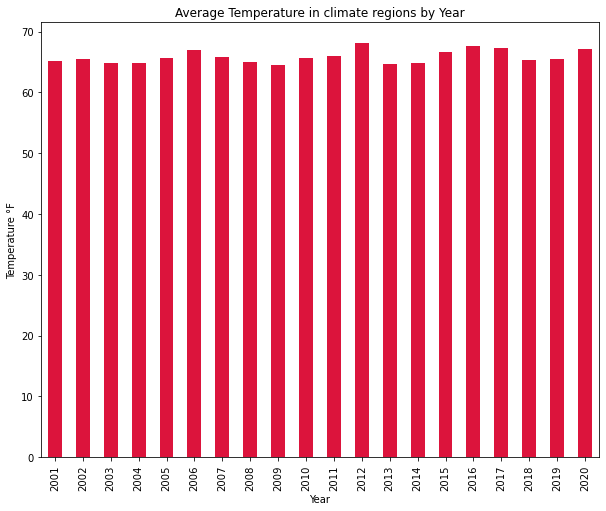

In [17]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['avg_tmax'].mean()
years_temp.plot(kind = 'bar', figsize = (10, 8),color ='crimson')
plt.xlabel("Year")
plt.ylabel("Temperature °F")
plt.title(f'Average Temperature in climate regions by Year');
plt.savefig('./images_DC/Average_temp_by_years.png')

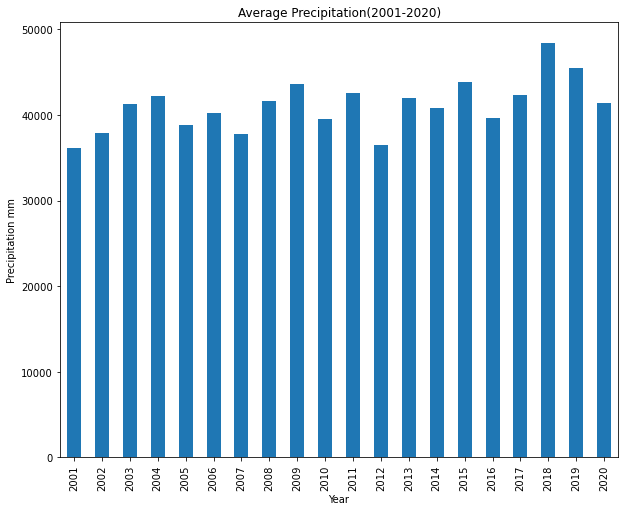

In [18]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['total_avg_prcp_mm'].sum()
years_temp.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("Precipitation mm")
plt.title(f'Average Precipitation(2001-2020)');
plt.savefig('./images_j/Average_prec_by_years.png')

In [19]:
southwest=data[data['climate_regions']=='Southwest']
west=data[data['climate_regions']=='West']
nrp=data[data['climate_regions']=='Northern Rockies and Plains']
northwest=data[data['climate_regions']=='Northwest']

southwest.set_index('ValidEnd',inplace=True)
west.set_index('ValidEnd',inplace=True)
nrp.set_index('ValidEnd',inplace=True)
northwest.set_index('ValidEnd',inplace=True)

In [20]:
southwest_df=southwest.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

west_df=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

nrp_df=nrp.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

northwest_df=northwest.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

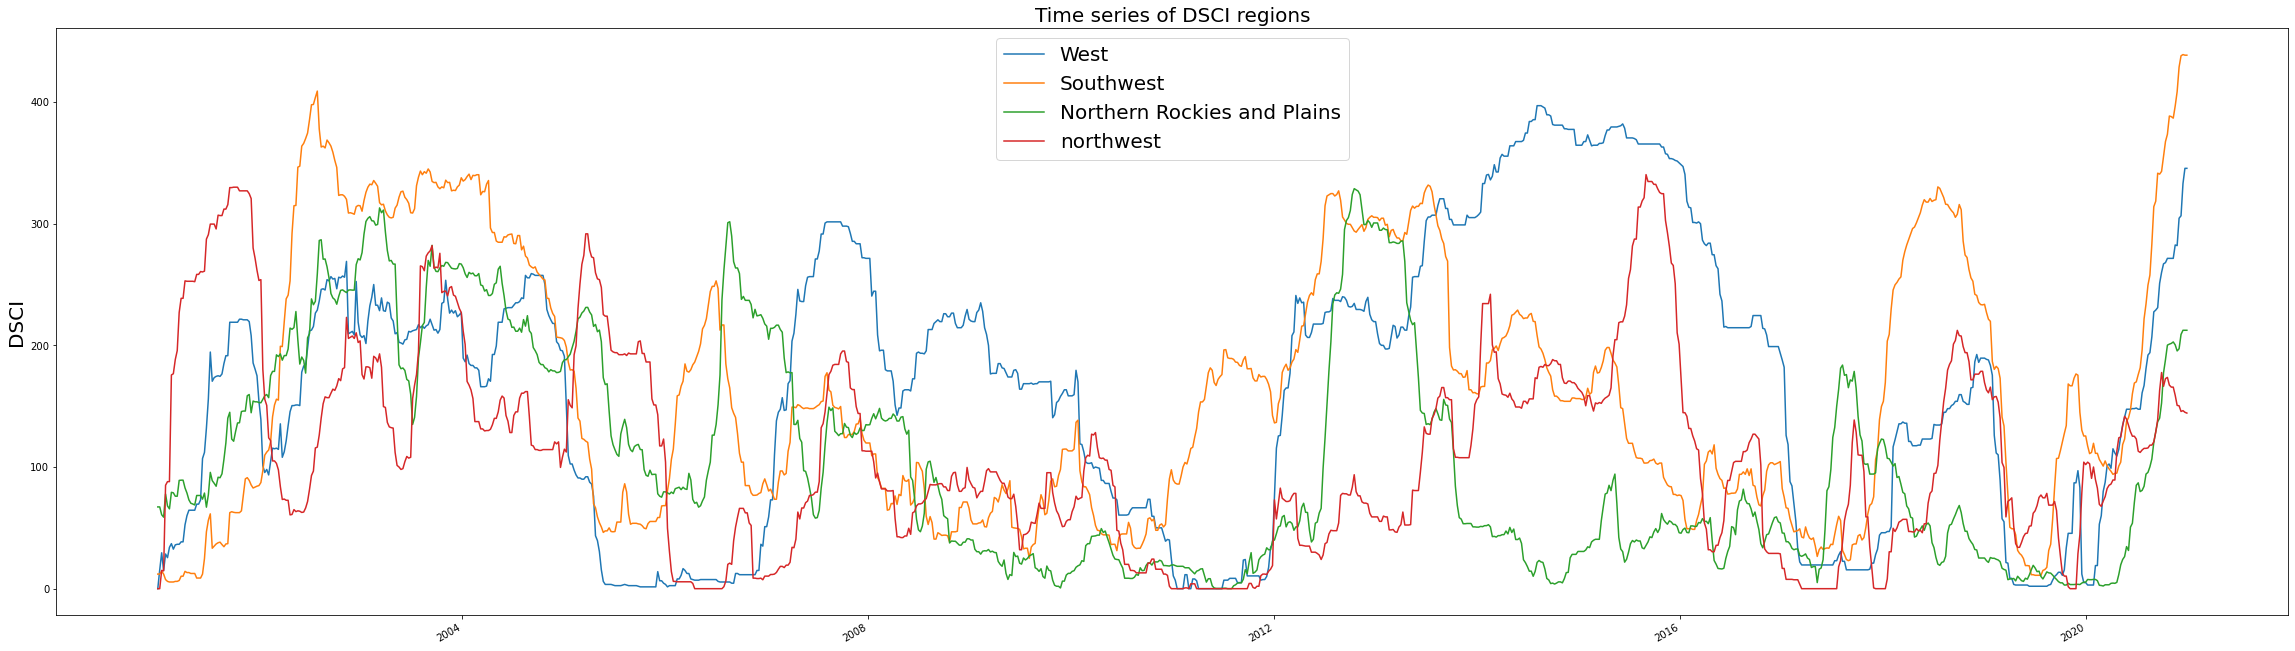

In [25]:
fig, ax = plt.subplots(figsize=(40, 12))

ax.plot(west_df['DSCI'])
ax.plot(southwest_df['DSCI'])
ax.plot(nrp_df['DSCI'])
ax.plot(northwest_df['DSCI'])

plt.title('Time series of DSCI regions',fontdict={'fontsize':20});
plt.ylabel("DSCI",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper center',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images_j/time_series_3_drought_regions.png')

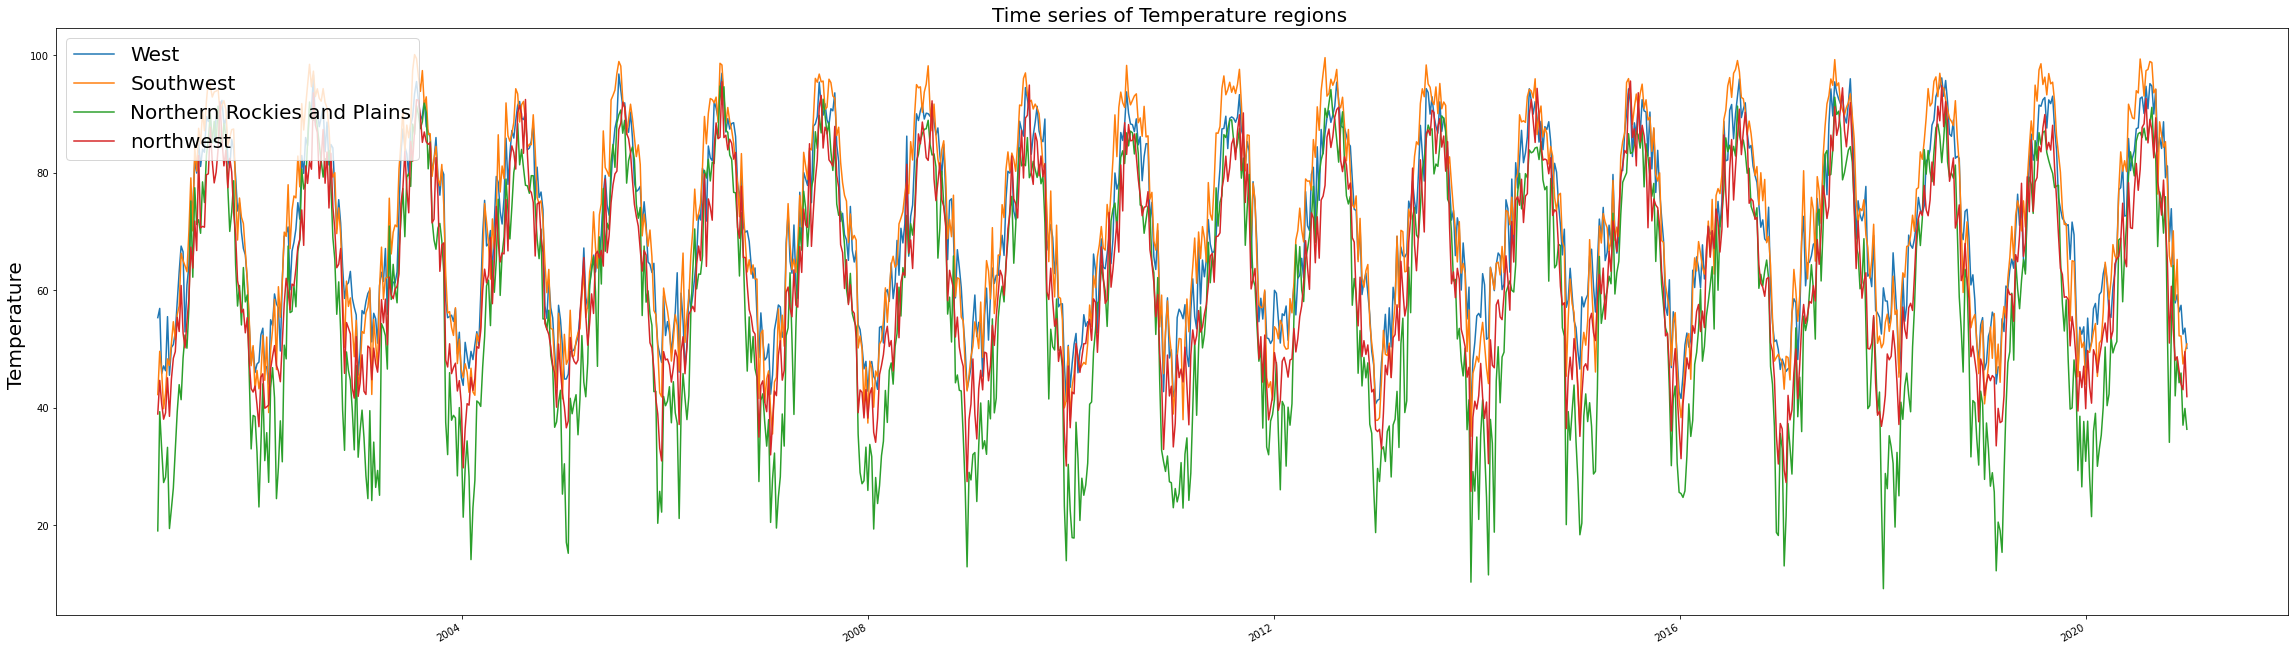

In [26]:
fig, ax = plt.subplots(figsize=(40,12))

ax.plot(west_df['avg_tmax'])
ax.plot(southwest_df['avg_tmax'])
ax.plot(nrp_df['avg_tmax'])
ax.plot(northwest_df['avg_tmax'])

plt.title('Time series of Temperature regions ',fontdict={'fontsize':20});
plt.ylabel("Temperature ",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images_j/time_serie_temp_3_regions.png')

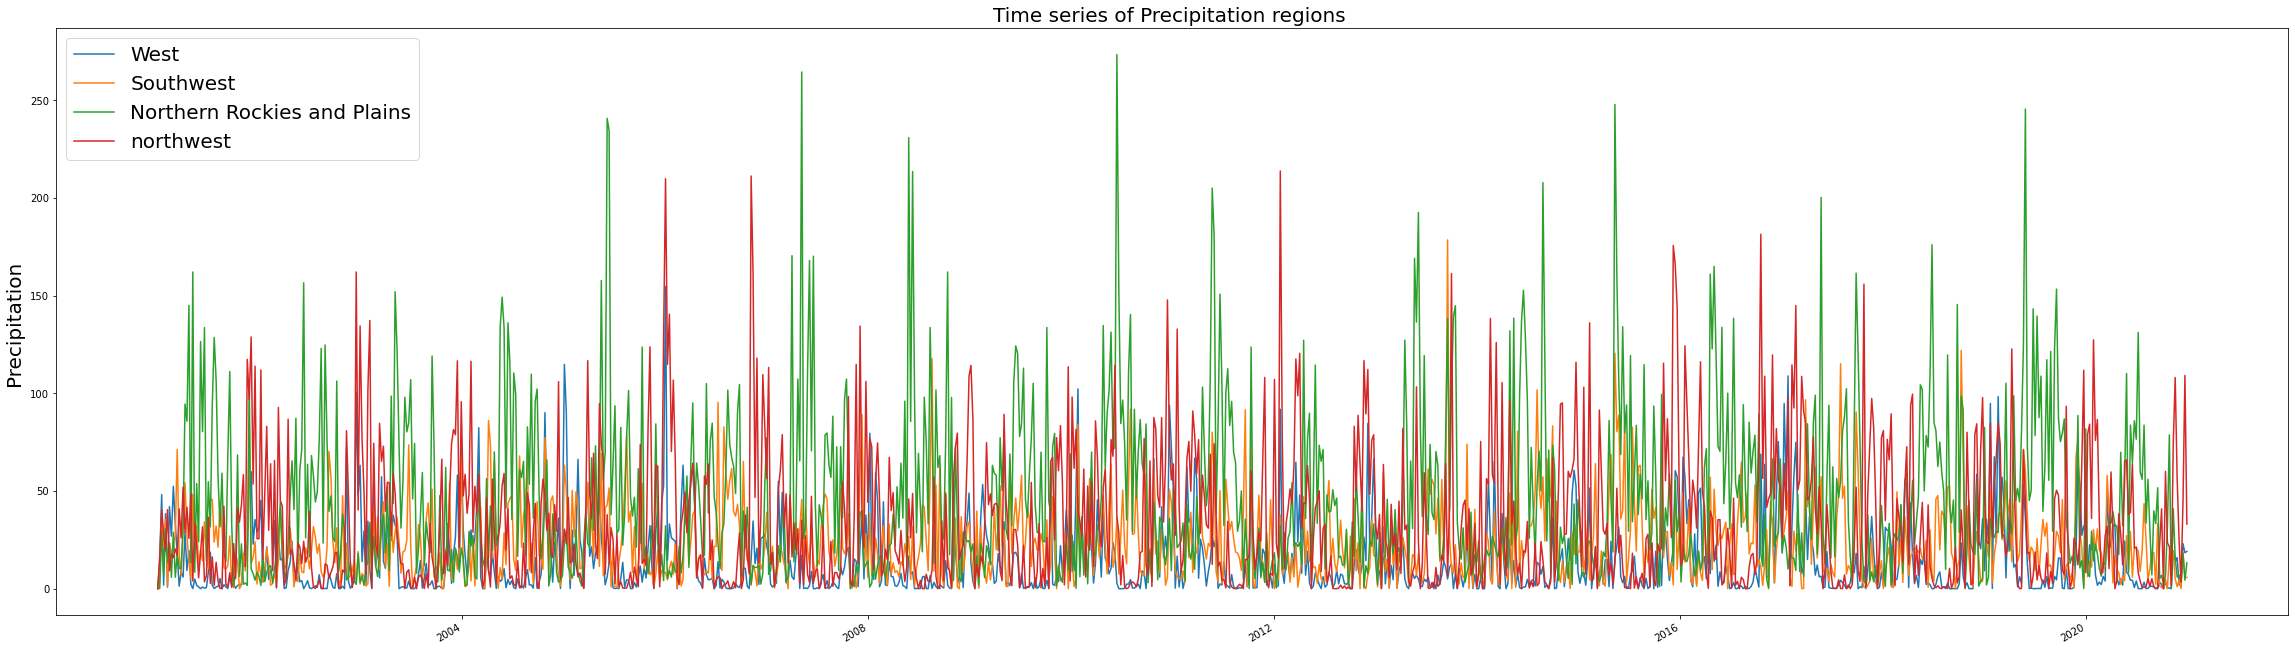

In [27]:
fig, ax = plt.subplots(figsize=(40, 12))

ax.plot(west_df['total_avg_prcp_mm'])
ax.plot(southwest_df['total_avg_prcp_mm'])
ax.plot(nrp_df['total_avg_prcp_mm'])
ax.plot(northwest_df['total_avg_prcp_mm'])

plt.title('Time series of Precipitation regions ',fontdict={'fontsize':20});
plt.ylabel("Precipitation ",fontdict={'fontsize':20})
plt.legend(['West','Southwest','Northern Rockies and Plains','northwest'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images_j/time_series_3_prec_regions.png')

### West Analysis

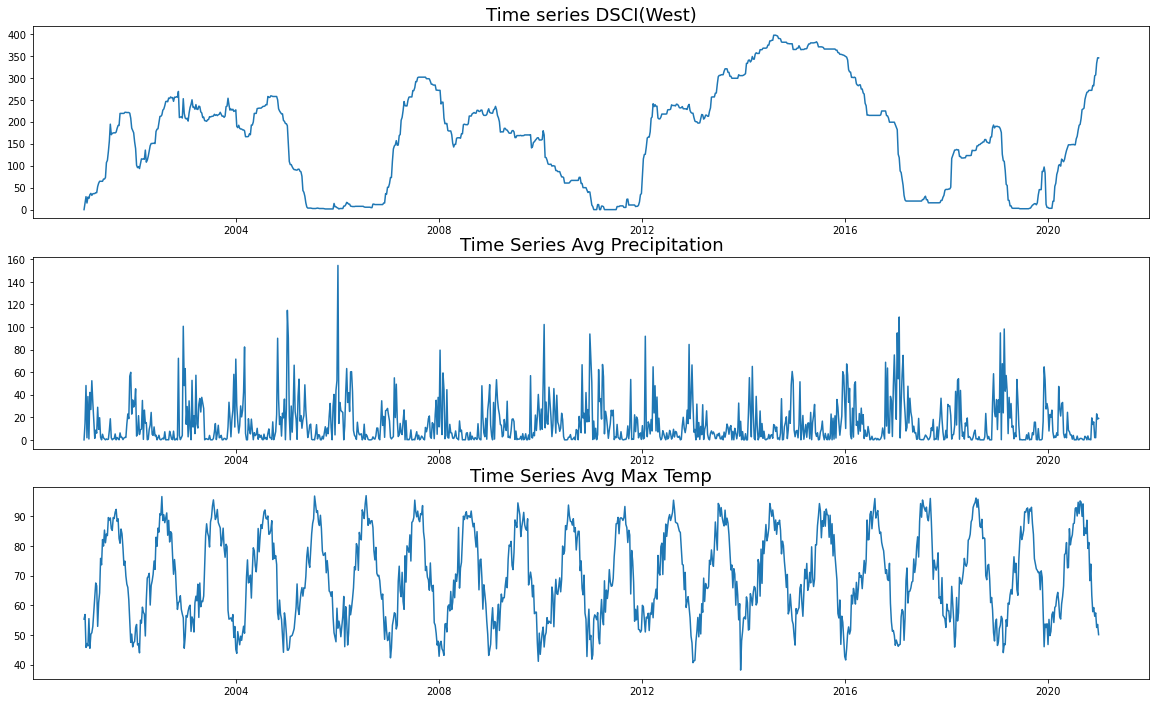

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(20,12))
ax1.plot(west_df['DSCI'])
ax1.set_title('Time series DSCI(West)',fontdict={'fontsize':18});
ax2.plot(west_df['total_avg_prcp_mm'],)
ax2.set_title('Time Series Avg Precipitation',fontdict={'fontsize':18});
ax3.plot(west_df['avg_tmax'])
ax3.set_title('Time Series Avg Max Temp',fontdict={'fontsize':18})
fig.savefig('./images_DC/Time_series_west.png');

### Southwest Analysis

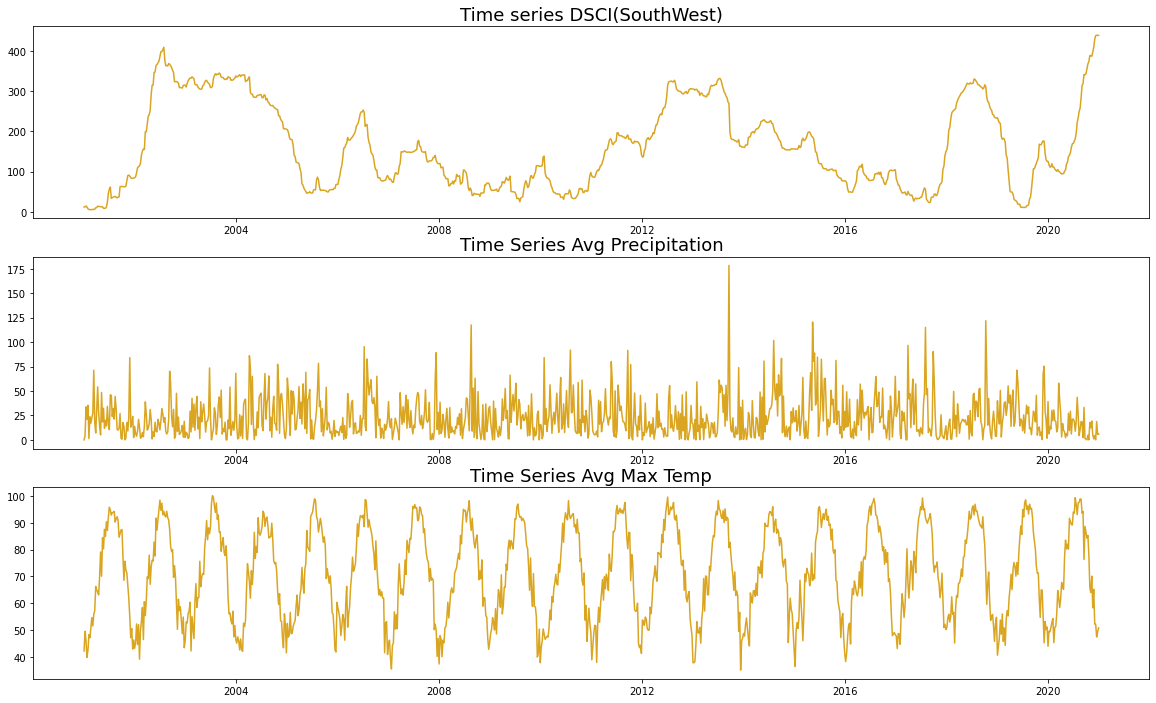

In [65]:
fig, (ax4,ax5,ax6) = plt.subplots(3,figsize=(20,12))
ax4.plot(southwest_df['DSCI'],color='goldenrod')
ax4.set_title('Time series DSCI(SouthWest)',fontdict={'fontsize':18});
ax5.plot(southwest_df['total_avg_prcp_mm'],color='goldenrod')
ax5.set_title('Time Series Avg Precipitation',fontdict={'fontsize':18});
ax6.plot(southwest_df['avg_tmax'],color='goldenrod')
ax6.set_title('Time Series Avg Max Temp',fontdict={'fontsize':18})
fig.savefig('./images_DC/Time_series_southwest.png');

### Northern Rockies and Plains Analysis

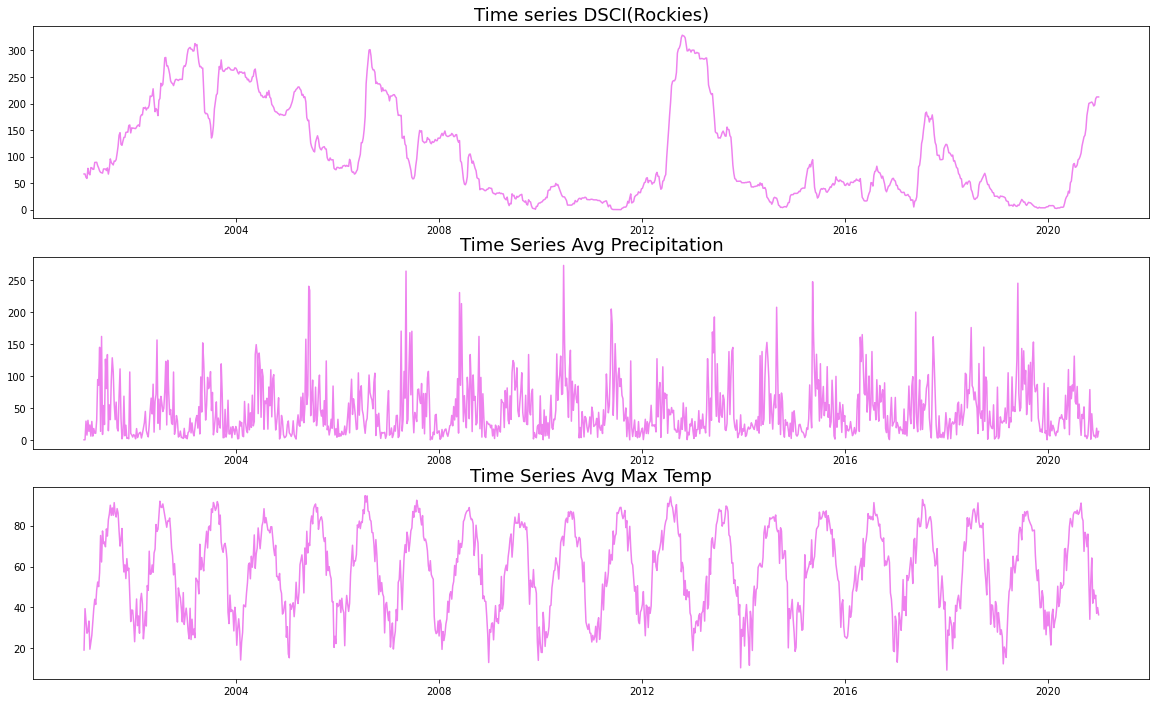

In [69]:
fig, (ax7,ax8,ax9) = plt.subplots(3,figsize=(20,12))
ax7.plot(nrp_df['DSCI'],color='violet')
ax7.set_title('Time series DSCI(Rockies)',fontdict={'fontsize':18});
ax8.plot(nrp_df['total_avg_prcp_mm'],color='violet')
ax8.set_title('Time Series Avg Precipitation',fontdict={'fontsize':18});
ax9.plot(nrp_df['avg_tmax'],color='violet')
ax9.set_title('Time Series Avg Max Temp',fontdict={'fontsize':18})
fig.savefig('./images_DC/Time_series_rockies.png');

### northwest Analysis

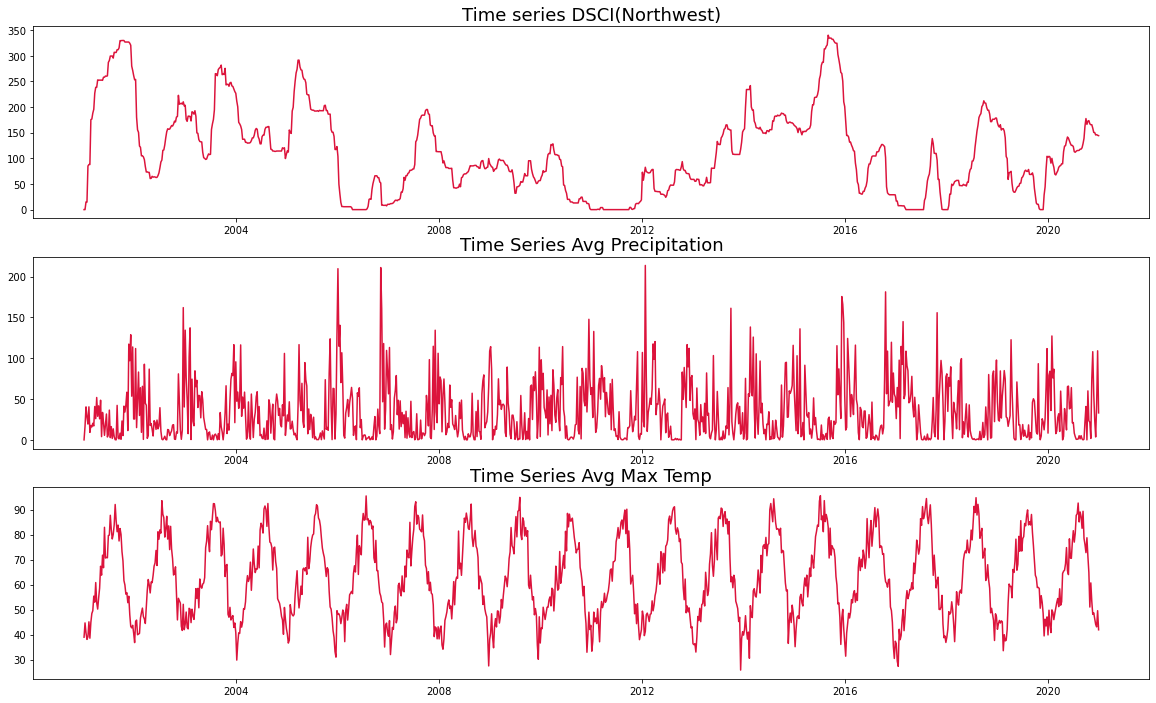

In [70]:
fig, (ax10,ax11,ax12) = plt.subplots(3,figsize=(20,12))
ax10.plot(northwest_df['DSCI'],color='crimson')
ax10.set_title('Time series DSCI(Northwest)',fontdict={'fontsize':18});
ax11.plot(northwest_df['total_avg_prcp_mm'],color='crimson')
ax11.set_title('Time Series Avg Precipitation',fontdict={'fontsize':18});
ax12.plot(northwest_df['avg_tmax'],color='crimson')
ax12.set_title('Time Series Avg Max Temp',fontdict={'fontsize':18})
fig.savefig('./images_DC/Time_series_northwest.png');

## graphics of the states 

In [71]:
data.groupby(data['state'])['DSCI'].median()

state
AL     35.0
AR     20.0
AZ    197.0
CA    140.0
CO    104.0
DE      0.0
FL     28.0
GA     60.0
IA     16.0
ID    116.0
IL      7.0
IN      0.0
KS     66.0
KY      1.0
LA     26.0
MA      0.0
MD      5.0
ME      0.0
MI     16.0
MN     30.0
MO     24.0
MS     17.0
MT     74.0
NC     37.5
ND     50.0
NE     54.0
NH      0.0
NJ      0.0
NM    145.0
NV    181.5
NY      7.0
OH      1.0
OK     74.0
OR    101.0
SC     56.0
SD     66.0
TN     11.5
TX    106.0
UT    142.5
VA     15.5
VT      0.0
WA     59.0
WI     16.0
WV      3.0
WY     90.0
Name: DSCI, dtype: float64

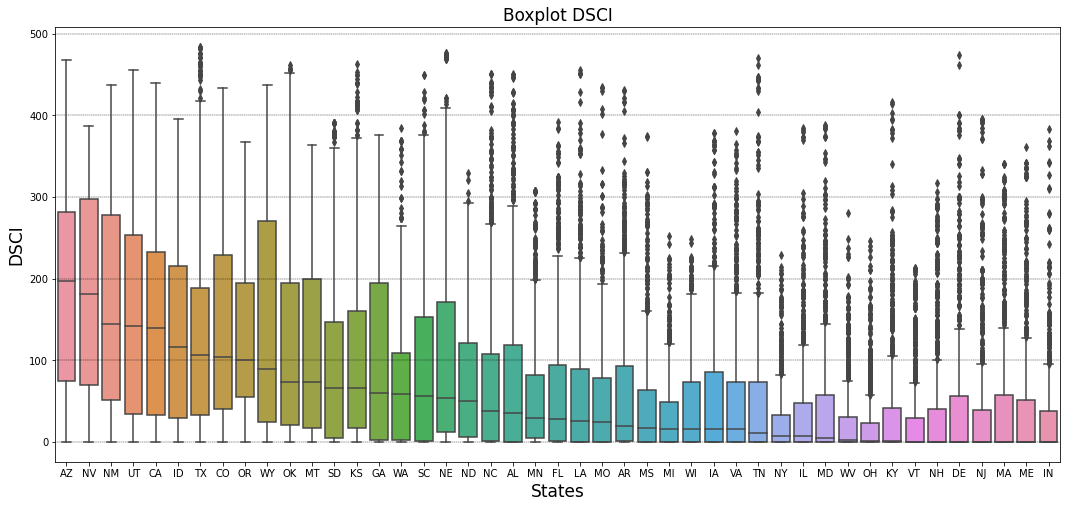

In [82]:
#graph the DCSI of the regions
my_order = data.groupby(by=['state'])['DSCI'].median().sort_values().iloc[::-1].index
plt.figure(figsize=(18, 8))
sns.boxplot(x='state',
    y='DSCI',
    data=data,order=my_order)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('States',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('./images_j/drought_boxplot_states.png')

In [74]:
#creating a dataframe for the avarege drought of the state by year
mean_year= data.groupby(by=[data['ValidEnd'].dt.year,data['state']])['DSCI'].agg([ 'mean'])
mean_year.reset_index(inplace=True)
mean_year.rename(columns={'mean':'mean_DSCI'},inplace=True)
mean_year.head()

ValidEnd state  mean_DSCI
0      2001    AL  51.320755
1      2001    AR  46.792453
2      2001    AZ   1.981132
3      2001    CA  89.188679
4      2001    CO  18.962264

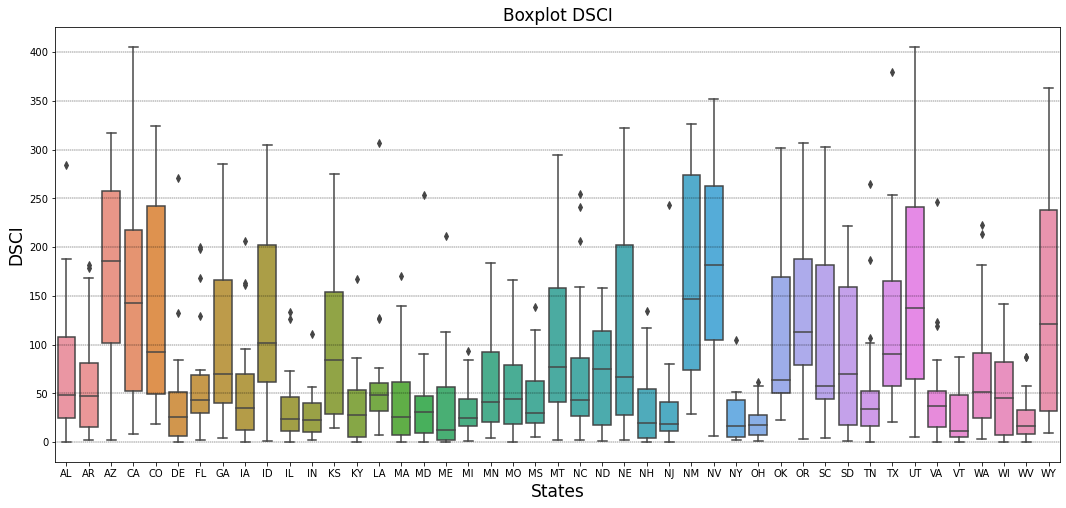

In [81]:
#graph the DCSI of the regions
plt.figure(figsize=(18, 8))
sns.boxplot(x='state',
    y='mean_DSCI',
    data=mean_year)

plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('States',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('./images_j/drought_boxplot.png')